In [11]:
#importing packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet

In [12]:
#importing data
df = pd.read_csv("cleanedData.csv")
df.set_index('ID', inplace=True)

df.head(5)

,price,yearBuilt,livingArea,bathrooms,bedrooms,parking,garageSpaces,hasGarage,pool,spa
ID,,,,,,,,,,
1,169900,1985,2302,3,4,0,0,0,0,0
2,159000,1910,2864,2,4,0,0,0,0,0
3,45000,1945,728,1,1,1,0,0,0,0
4,165000,1971,1620,2,2,0,0,0,0,0
5,173500,1980,1512,2,3,0,0,0,0,0


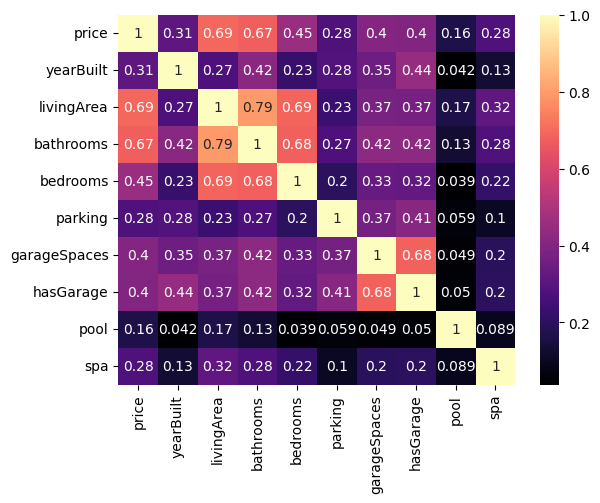

In [13]:
#heatmap
sb.heatmap(df.corr(), annot=True, cmap='magma')
plt.savefig('heatmap.png')
plt.show()

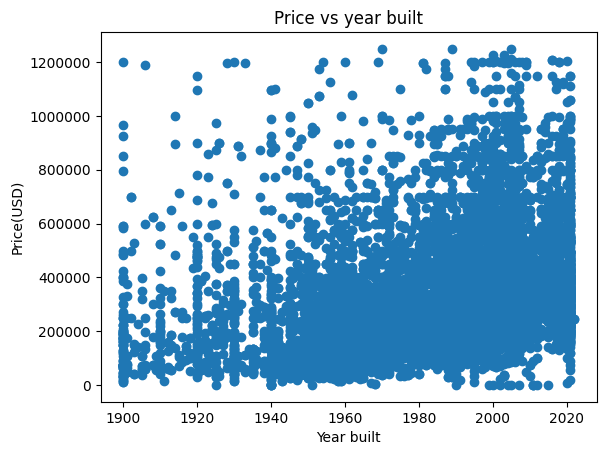

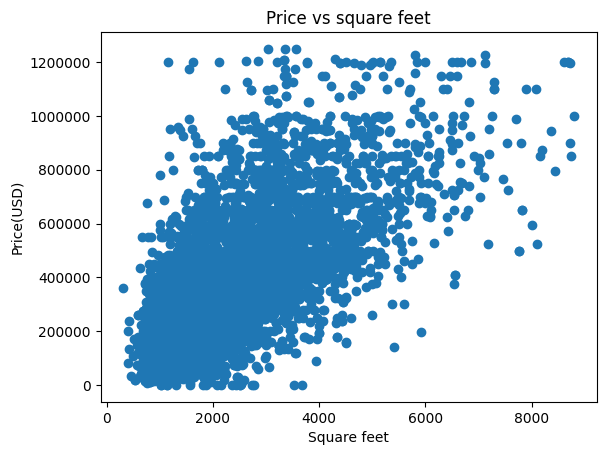

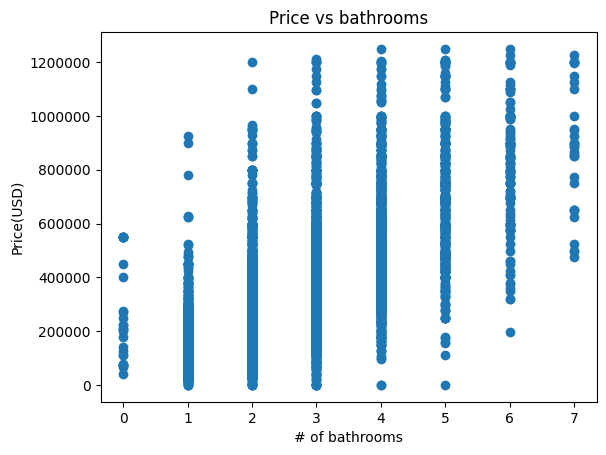

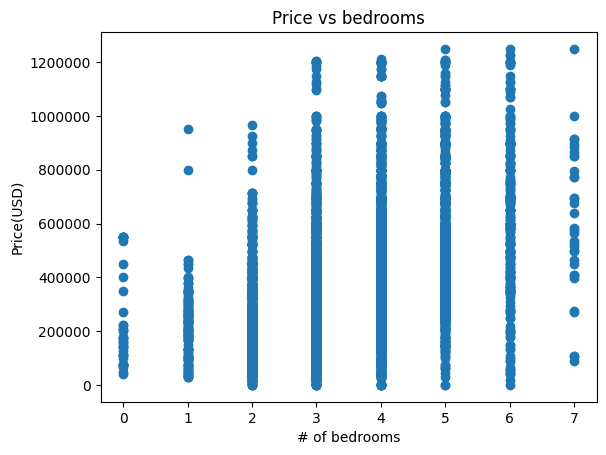

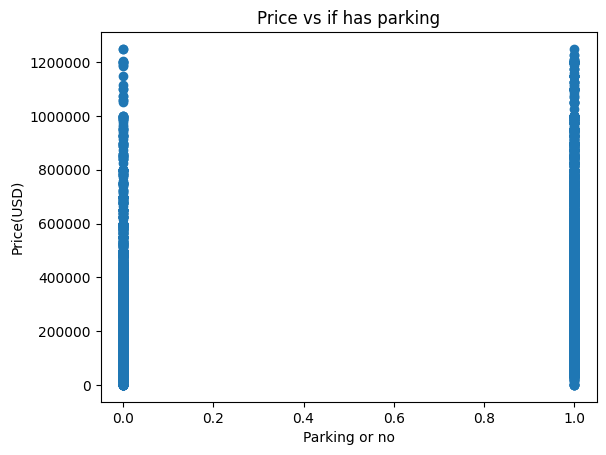

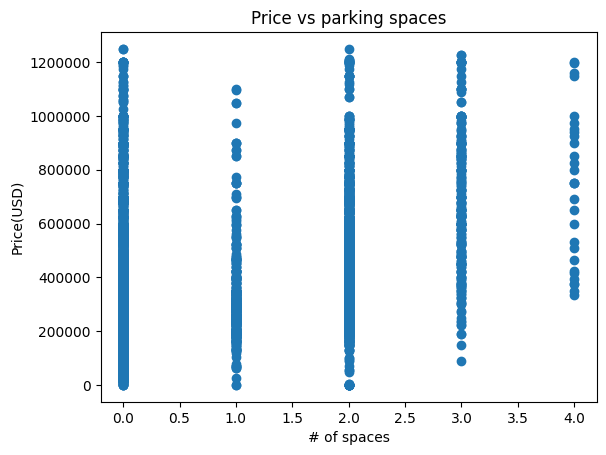

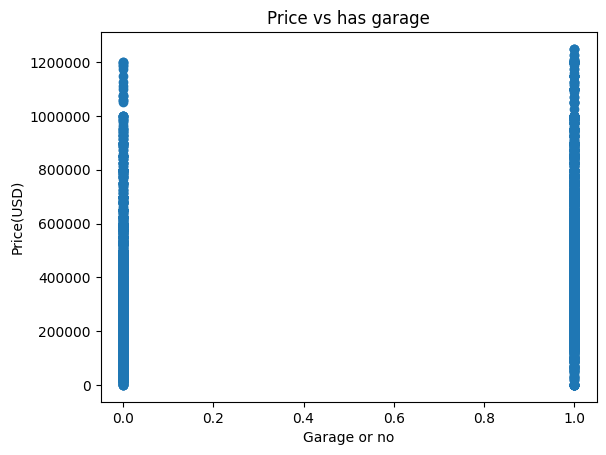

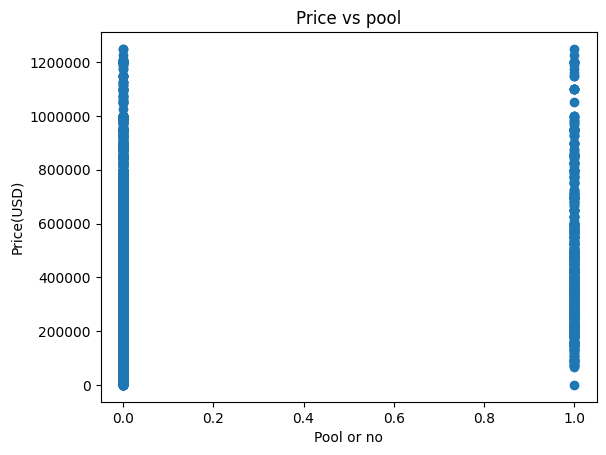

Text(0, 0.5, 'Price(USD)')

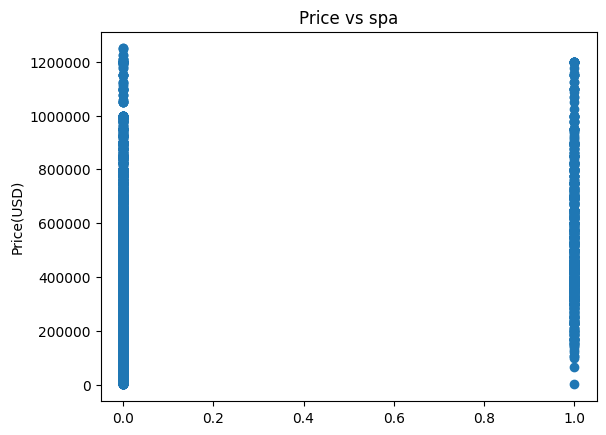

In [14]:
#scatterplot
#price & year built
prices = [i for i in df['price']]
yearBuiltList = [i for i in df['yearBuilt']]
plt.scatter(yearBuiltList, prices)
plt.ticklabel_format(style='plain')
plt.title("Price vs year built")
plt.ylabel("Price(USD)")
plt.xlabel("Year built")
plt.show()

#price & size
yearBuiltList = [i for i in df['livingArea']]
plt.scatter(yearBuiltList, prices)
plt.ticklabel_format(style='plain')
plt.title("Price vs square feet")
plt.ylabel("Price(USD)")
plt.xlabel("Square feet")
plt.show()

#price & bathrooms
yearBuiltList = [i for i in df['bathrooms']]
plt.scatter(yearBuiltList, prices)
plt.ticklabel_format(style='plain')
plt.title("Price vs bathrooms")
plt.ylabel("Price(USD)")
plt.xlabel("# of bathrooms")
plt.show()

#price & bedrooms
yearBuiltList = [i for i in df['bedrooms']]
plt.scatter(yearBuiltList, prices)
plt.ticklabel_format(style='plain')
plt.title("Price vs bedrooms")
plt.ylabel("Price(USD)")
plt.xlabel("# of bedrooms")
plt.show()

#price & parking
yearBuiltList = [i for i in df['parking']]
plt.scatter(yearBuiltList, prices)
plt.ticklabel_format(style='plain')
plt.title("Price vs if has parking")
plt.ylabel("Price(USD)")
plt.xlabel("Parking or no")
plt.show()

#price & garageSpaces
yearBuiltList = [i for i in df['garageSpaces']]
plt.scatter(yearBuiltList, prices)
plt.ticklabel_format(style='plain')
plt.title("Price vs parking spaces")
plt.ylabel("Price(USD)")
plt.xlabel("# of spaces")
plt.show()

#price & hasGarage
yearBuiltList = [i for i in df['hasGarage']]
plt.scatter(yearBuiltList, prices)
plt.ticklabel_format(style='plain')
plt.title("Price vs has garage")
plt.ylabel("Price(USD)")
plt.xlabel("Garage or no")
plt.show()

#price & pool
yearBuiltList = [i for i in df['pool']]
plt.scatter(yearBuiltList, prices)
plt.ticklabel_format(style='plain')
plt.title("Price vs pool")
plt.ylabel("Price(USD)")
plt.xlabel("Pool or no")
plt.show()

#price & spa
yearBuiltList = [i for i in df['spa']]
plt.scatter(yearBuiltList, prices)
plt.ticklabel_format(style='plain')
plt.title("Price vs spa")
plt.ylabel("Price(USD)")

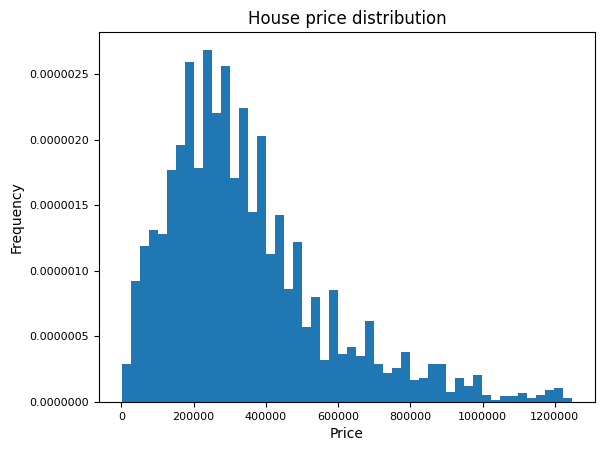

In [15]:
plt.hist(df['price'], bins=50, density=True)

# Set the x-axis label
plt.xlabel('Price')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the title of the plot
plt.title('House price distribution')

# Display the plot
plt.ticklabel_format(style='plain')
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.show()

In [21]:
X = df[['yearBuilt','livingArea','bathrooms','bedrooms', 'parking','garageSpaces', 'hasGarage', 'pool']].values  # features
y = df['price'].values  # target variable

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [33]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
lr = LinearRegression()
ridge = Ridge(alpha = 0.5)

# 3. Lasso

lasso = Lasso(alpha = 0.01)

# 4. Bayesian

bayesian = BayesianRidge()

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)

neural = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', solver='adam', max_iter=1000, random_state=42)

In [34]:
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
bayesian.fit(X_train, y_train)
en.fit(X_train, y_train)
neural.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42)

In [35]:
y_pred = rf.predict(X_test)
RS_y_pred = lr.predict(X_test)
ridge_yhat = ridge.predict(X_test)
lasso_yhat = lasso.predict(X_test)
bay_yhat = bayesian.predict(X_test)
en_yhat = en.predict(X_test)
neural_pred = neural.predict(X_test)

In [29]:
rsR2 = r2_score(y_test, RS_y_pred)
rfR2 = r2_score(y_test, y_pred)
ridgeR2 = r2_score(y_test, ridge_yhat)
lassoR2 = r2_score(y_test, lasso_yhat)
bayR2 = r2_score(y_test, bay_yhat)
enR2 = r2_score(y_test, en_yhat)
neuralR2 = r2_score(y_test, neural_pred)

print('Neural network r2: ', neuralR2)
print('linear regression r2: ', rsR2)
print('Random forrest r2: ', rfR2)
print('Ridge r2: ', ridgeR2)
print('Lasso r2: ', lassoR2)
print('Bay r2: ', bayR2)
print('EN r2: ', enR2)

Neural network r2:  0.4849870145992037
linear regression r2:  0.5544041354904872
Random forrest r2:  0.6183976518947125
Ridge r2:  0.5544067334019693
Lasso r2:  0.5544041422844594
Bay r2:  0.5545109402335138
EN r2:  0.5545512540096861


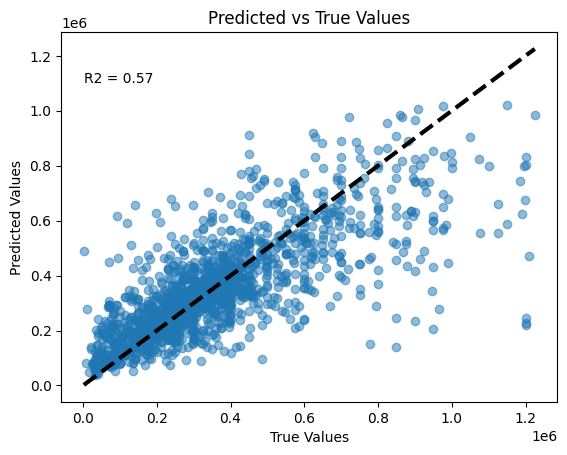

In [74]:
# assume your true and predicted values are stored in variables y_true and y_pred, respectively

# create a scatter plot of predicted vs true values
plt.scatter(y_test, y_pred, alpha=0.5)

# add a line of perfect fit to the plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)

# set plot title and labels
plt.title('Predicted vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# display R2 value as text in the plot
r2 = r2_score(y_test, y_pred)
plt.text(y_test.min(), y_test.max()*0.9, f'R2 = {r2:.2f}')

# show the plot
plt.show()
